In [1]:
import geopandas as gpd
import pandas as pd
from shapely import wkt

In [2]:
arboles = pd.read_csv("data/arboles.csv")

In [3]:
# Función para convertir latitud o longitud
def convertir_coordenadas(coord_str):
    coord_str = coord_str.replace('.', '')
    coord_str = coord_str[:3] + '.' + coord_str[3:]
    return float(coord_str)

In [4]:
# Aplicar la función a las columnas 'latitud' y 'longitud'
arboles['lat'] = arboles['lat'].apply(convertir_coordenadas)
arboles['lng'] = arboles['lng'].apply(convertir_coordenadas)

In [5]:
arboles['lng'] = pd.to_numeric(arboles['lng'], errors='coerce')
arboles['lat'] = pd.to_numeric(arboles['lat'], errors='coerce')

In [6]:
gdf_arboles = gpd.GeoDataFrame(arboles, geometry=gpd.points_from_xy(arboles.lng, arboles.lat))

In [7]:
barrios = pd.read_csv("data/Barrios - Barrios.csv")
barrios['geometry'] = barrios['the_geom_barrios'].apply(wkt.loads)
gdf_barrios = gpd.GeoDataFrame(barrios, geometry='geometry')

In [8]:
gdf_arboles = gdf_arboles.set_crs("EPSG:4326")  # WGS84 (lat/lon)
gdf_barrios = gdf_barrios.set_crs("EPSG:3857")  # CRS de los polígonos de barrios (asumiendo que estén en metros)

In [9]:
# Convertir los puntos de los árboles al mismo CRS que los barrios (si es necesario)
gdf_arboles = gdf_arboles.to_crs(gdf_barrios.crs)

In [10]:
print(gdf_arboles.crs)
print(gdf_barrios.crs)

EPSG:3857
EPSG:3857


In [20]:
arboles_en_barrios = gpd.sjoin(gdf_barrios, gdf_arboles,  how="left", predicate="intersects")

In [21]:
# Mostrar los resultados
print(arboles_en_barrios[['lat', 'lng', 'nombre_barrio']])

     lat  lng               nombre_barrio
0    NaN  NaN        MERCEDITAS COLLANTES
1    NaN  NaN                  SAMELA SUR
2    NaN  NaN             PARAJE PERICHON
3    NaN  NaN              SANTA RITA SUR
4    NaN  NaN            SANTA RITA NORTE
..   ...  ...                         ...
135  NaN  NaN                   COLLANTES
136  NaN  NaN            ZONA SUR PIRAYUI
137  NaN  NaN               PIRAYUI NUEVO
138  NaN  NaN  ASENTAMIENTO PUNTA TAITALO
139  NaN  NaN              SANTA CATALINA

[140 rows x 3 columns]


In [17]:
# Realizar la operación espacial para encontrar en qué barrio se encuentran los puntos de árboles
arboles_en_barrios = gpd.sjoin(gdf_barrios, gdf_arboles, how="left", predicate="within")

In [18]:
# Mostrar los resultados
print(arboles_en_barrios[['lat', 'lng', 'nombre_barrio']])

            lat        lng nombre_barrio
0    -27.471856 -58.837098           NaN
1    -27.471663 -58.837121           NaN
2    -27.470889 -58.837567           NaN
3    -27.470922 -58.836943           NaN
4    -27.470951 -58.836670           NaN
...         ...        ...           ...
7136 -27.459263 -58.831080           NaN
7137 -27.459104 -58.830924           NaN
7138 -27.459018 -58.830998           NaN
7139 -27.458819 -58.831131           NaN
7140 -27.458797 -58.831051           NaN

[7141 rows x 3 columns]


<Axes: >

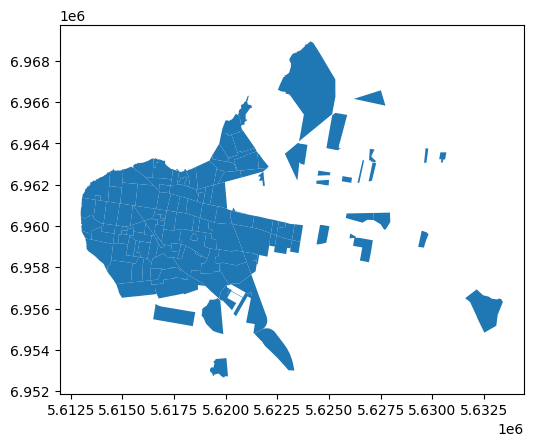

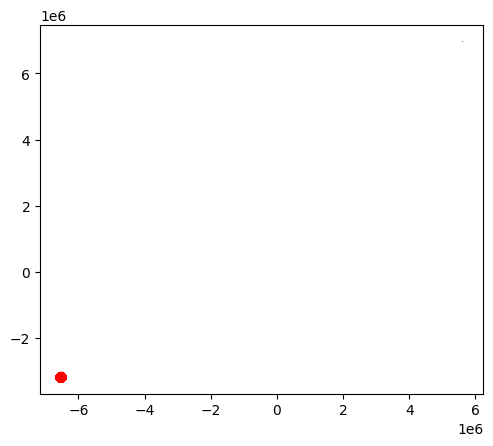

In [15]:
# Graficar los barrios
gdf_barrios.plot()

# Graficar los puntos de los árboles sobre los barrios
gdf_arboles.plot(ax=gdf_barrios.plot(), color='red')